In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

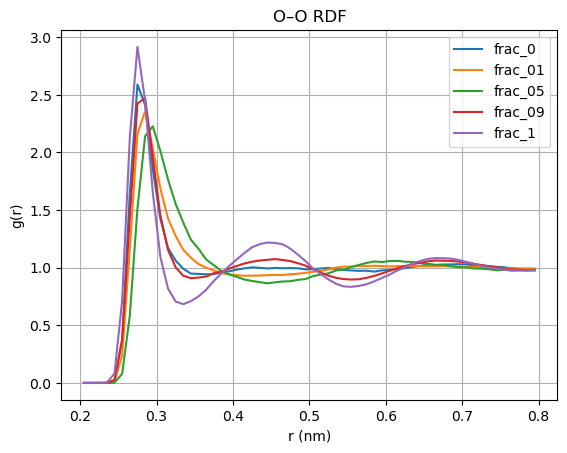

In [ ]:
arrow_ff_frac = ["0","01","05","09","1"]

for frac in arrow_ff_frac:
    trj_name = "wat900_mixff_" + frac + "_cv_2fs_fixedw_gpu.dcd"          
    trj = md.load(trj_name, top='wat900.gro') 

    # Define atom pairs for RDF (e.g., all O–O water pairs)
    oxygen_indices = trj.topology.select('name O')  # TIP3P water oxygen
    pairs = np.array([[i, j] for i in oxygen_indices for j in oxygen_indices if i < j])

    # Compute RDF
    r, g_r = md.compute_rdf(trj, pairs, r_range=(0.2, 0.8), bin_width=0.01)

    label = "arrow_frac_" + frac
    # Plot RDF
    plt.plot(r, g_r, label=label)
    plt.xlabel('r (nm)')
    plt.ylabel('g(r)')
    plt.title('O–O RDF')
    plt.legend()
    plt.grid(True)
plt.show()